# CUSTOMER GROWTH FORECAST FOR EARLY START-UP

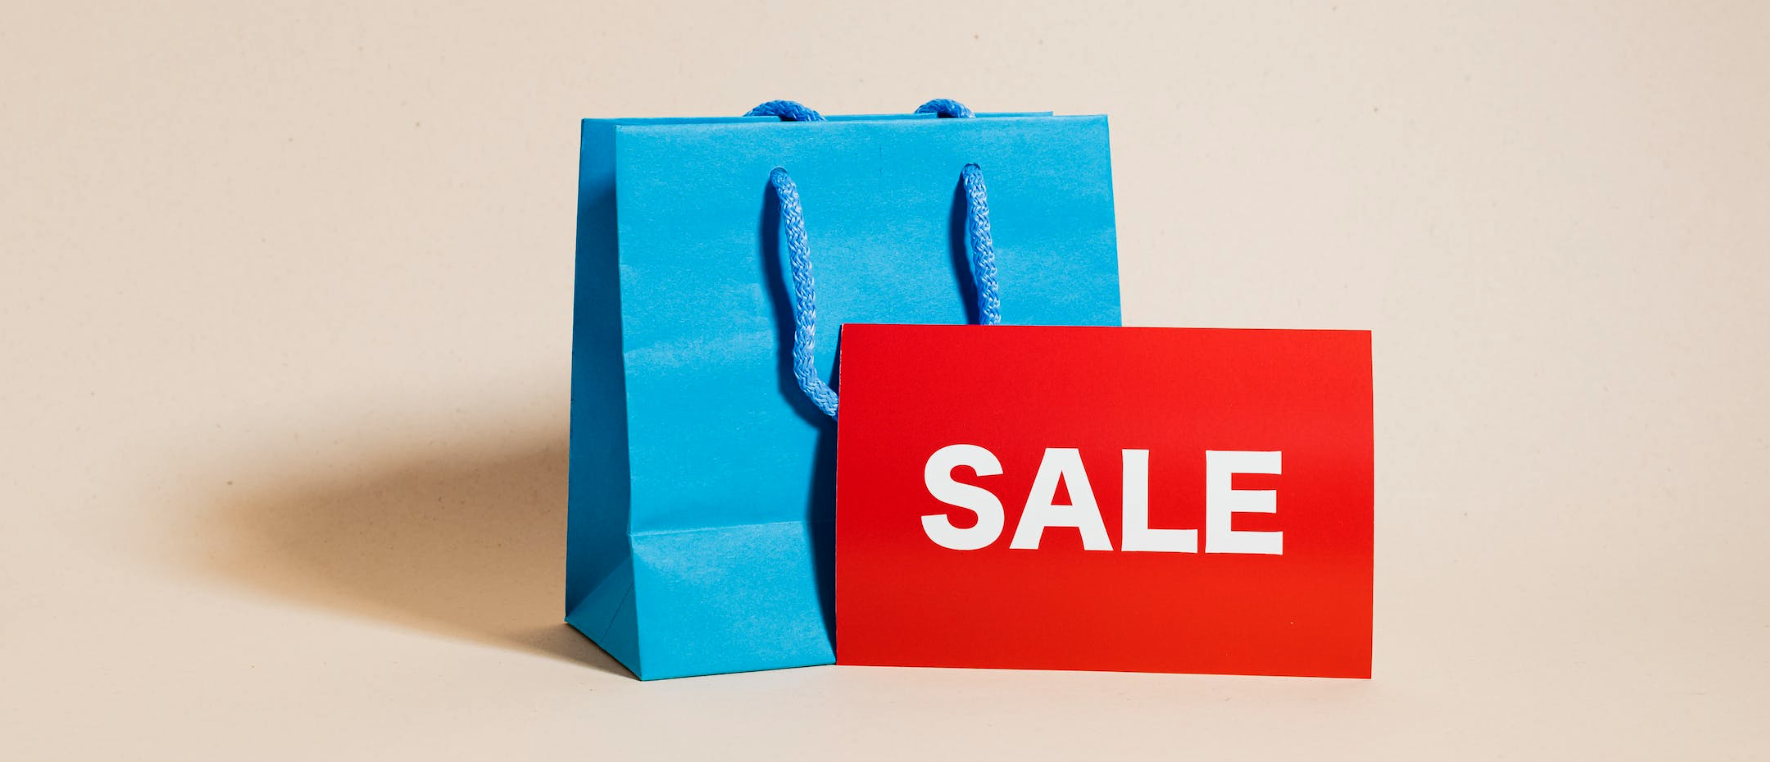

## Hemant Thapa

The Exponential Customer Growth Forecast model is a powerful tool for forecasting customer sales growth over a specified time period. This model is based on the exponential growth of customer sales, taking into account the fee, frequency of orders, number of customers, year, growth rate and sample rate. The model is implemented through a class in Python and can be used to generate a sample of customers, calculate the forecast for sales, plot the forecast as a bar graph, and also convert the forecast to a dataframe. The model provides a visual representation of the expected growth of customer sales, helping businesses make informed decisions about future growth and budgeting. The model is easy to use and can be customized to fit the specific needs of each business.

## IMPORT LIBRARIES

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

## EXPONENTIAL CUSTOMER GROWTH FORECAST

The forecasting model implemented in the SaleForecast class is an exponential growth model. This model assumes that the number of customers will grow exponentially over time at a specified growth rate. It calculates the sales forecast based on the number of customers, frequency of orders, and the fee of service.

In [169]:
class ExponentialCustomerGrowthForecast:
    
    def __init__(self, fee: float, frequency: int, num_customers: int, 
                 year: int, growth: float, sample_rate: float):
        self.fee = fee
        self.frequency = frequency
        self.num_customers = num_customers
        self.year = year
        self.growth = growth
        self.sample_rate = sample_rate

    def generate_sample(self):
        #creating sample from population
        #num of customers are population or total market
        #sample_rate is the hypothesis or market captured rate
        sample = int(self.num_customers * self.sample_rate)
        return sample

    def calculate_forecast(self):
        months = 12 * self.year
        sales = []
        for month in range(1, months + 1):
            sample = self.generate_sample()
            #first month growth rate will zero growth rate
            total_customers = sample * (1 + self.growth) ** (month - 1)
            num_orders = self.frequency  
            #montly sales will sum of sample per month, fee and number of orders (frequency)
            monthly_sales = total_customers * num_orders * self.fee
            sales.append(monthly_sales)
        return sales

    def plot_forecast(self):
        sales = self.calculate_forecast()
        months = list(range(1, 12 * self.year + 1))
        plt.style.use('dark_background')
        plt.figure(figsize=(15,6))
        plt.plot(months, sales, color="white", linestyle="--")
        plt.bar(months, sales, color="red")
        plt.grid(linestyle='--', color='gray', alpha=0.5)
        plt.xlabel('Months',fontsize=20)
        plt.ylabel('Sales',fontsize=20)
        plt.title('Customer Sales Growth Forecast',fontsize=20)
        plt.show()

    def to_dataframe(self):
        sales = self.calculate_forecast()
        months = list(range(1, 12 * self.year + 1))
        data = {'Month': months, 'Sales': sales}
        df = pd.DataFrame(data)
        return df

Let say, you are a early stage start-up companies. you want to project customer sales every month. we can use algorithms evaluating your price model. 

1. Number of customer: Population of the dataset or total customer.

2. Sample rate: It is 1 to 5 percent of market or customer acquisition.

3. Growth: The constant growth rate of customers (between 0 and 1).

4. Month: Time interval for sales are being forecasted.

5. Frequency: The number of orders per customer per month.

6. Fee: The price of the service or product.

In [170]:
fee = 2.99 #2.99 pounds service charge
frequency = 4 #Number of orders per customer
num_customers = 5000 #Population size
year = 5 #Number of years
growth = 0.05 #5% growth rate
sample_rate = 0.01 #5 percent of Market

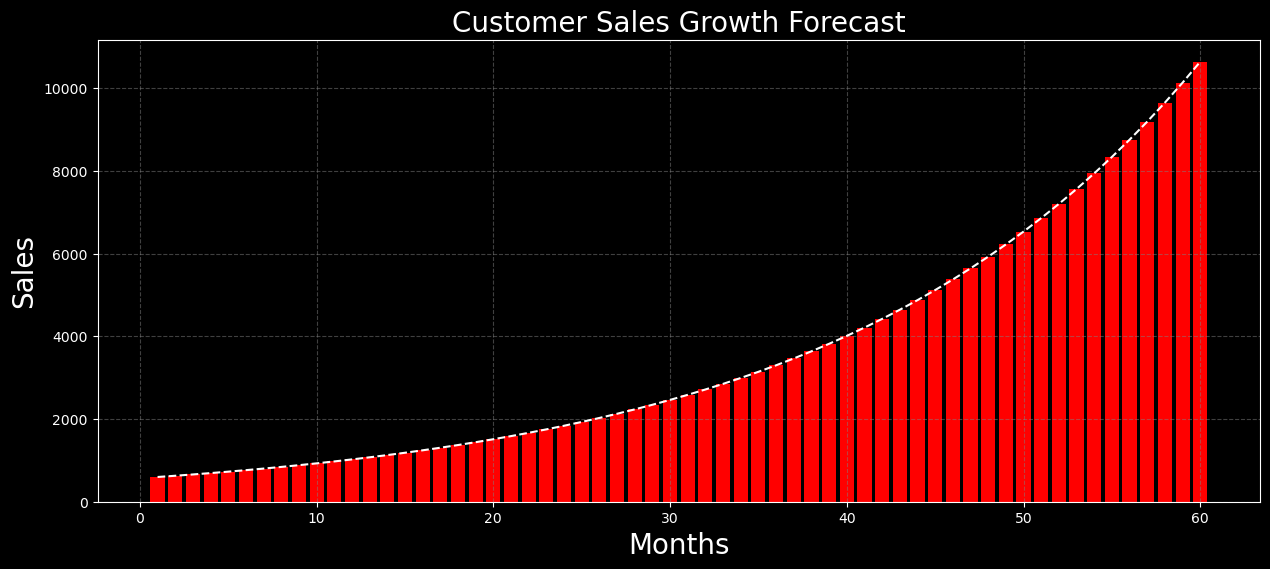

In [171]:
forecast = ExponentialCustomerGrowthForecast(fee, frequency, num_customers, year, growth, sample_rate)
forecast_df = forecast.to_dataframe()
forecast_plot = forecast.plot_forecast()

In [208]:
forecast_df

,Month,Sales,Date
0,1,598.000000,April 2023
1,2,627.900000,May 2023
2,3,659.295000,May 2023
3,4,692.259750,June 2023
4,5,726.872738,July 2023
5,6,763.216374,August 2023
6,7,801.377193,September 2023
7,8,841.446053,October 2023
8,9,883.518355,November 2023
9,10,927.694273,December 2023


## CONVERTING NUMBER TO MONTHS

In [172]:
def running_number_to_month(running_numbers):
    #year, month and day
    start_date = datetime.date(2023, 4, 1)
    month_difference = datetime.timedelta(days=30)
    months = []
    for running_number in running_numbers:
        target_date = start_date + (running_number - 1) * month_difference
        months.append(target_date.strftime("%B %Y"))
    return months

In [173]:
Date = running_number_to_month(list(range(1,61)))

In [174]:
Date[:10]

['April 2023',
 'May 2023',
 'May 2023',
 'June 2023',
 'July 2023',
 'August 2023',
 'September 2023',
 'October 2023',
 'November 2023',
 'December 2023']

In [175]:
forecast_df['Date'] = Date

In [176]:
forecast_df[:10]

,Month,Sales,Date
0,1,598.000000,April 2023
1,2,627.900000,May 2023
2,3,659.295000,May 2023
3,4,692.259750,June 2023
4,5,726.872738,July 2023
5,6,763.216374,August 2023
6,7,801.377193,September 2023
7,8,841.446053,October 2023
8,9,883.518355,November 2023
9,10,927.694273,December 2023


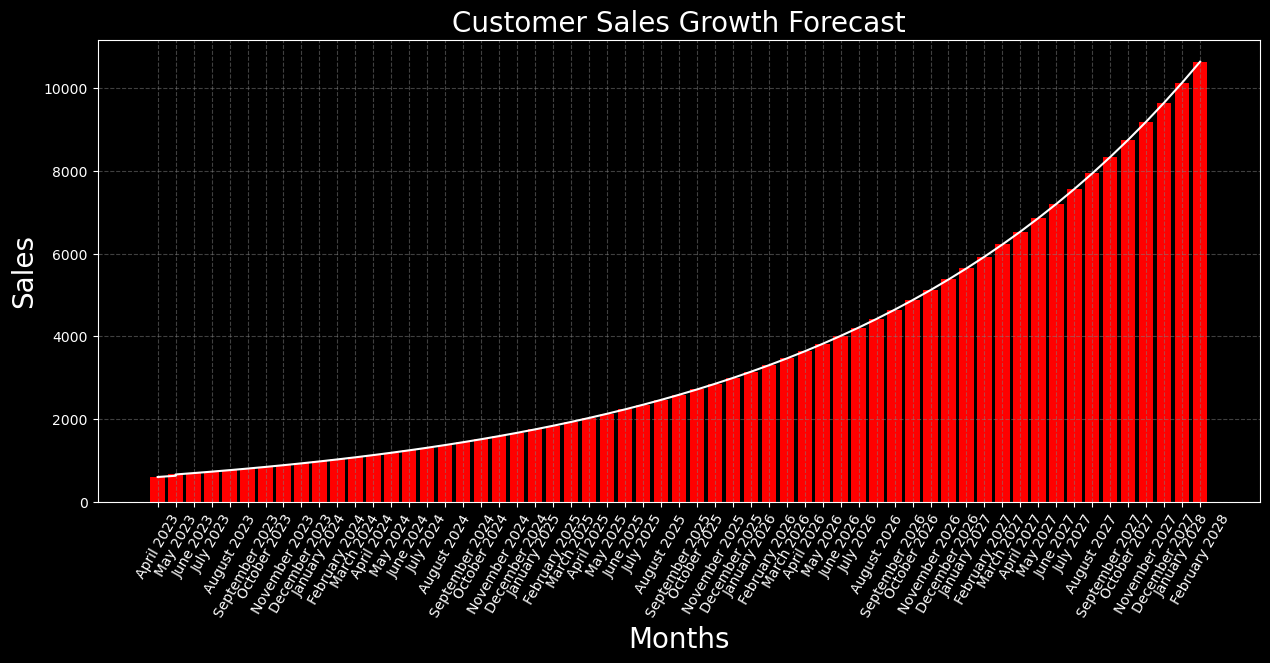

In [177]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
plt.plot(forecast_df["Date"], forecast_df["Sales"], color="white")
plt.bar(forecast_df["Date"], forecast_df["Sales"], color="red")
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.xticks(rotation=60)
plt.xlabel('Months',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.title('Customer Sales Growth Forecast',fontsize=20)
plt.show()

## GENERATE FORECASTS FOR THE ENTIRE POPULATION

In [190]:
population_forecast = ExponentialCustomerGrowthForecast(fee=100, frequency=1, num_customers=1000, year=5, growth=0.05, sample_rate=1.0)
population_df = population_forecast.to_dataframe()
population_df['Date'] = Date
population_df[:10]

,Month,Sales,Date
0,1,100000.000000,April 2023
1,2,105000.000000,May 2023
2,3,110250.000000,May 2023
3,4,115762.500000,June 2023
4,5,121550.625000,July 2023
5,6,127628.156250,August 2023
6,7,134009.564063,September 2023
7,8,140710.042266,October 2023
8,9,147745.544379,November 2023
9,10,155132.821598,December 2023


## GENERATE FORECASTS FOR A RANDOM SAMPLE OF THE POPULATION

In [195]:
# Generate forecasts for a random sample of the population
sample_forecast = ExponentialCustomerGrowthForecast(fee=100, frequency=1, num_customers=1000, year=5, growth=0.05, sample_rate=0.1)
sample_df = sample_forecast.to_dataframe()
sample_df['Date']=Date
sample_df[:10]

,Month,Sales,Date
0,1,10000.000000,April 2023
1,2,10500.000000,May 2023
2,3,11025.000000,May 2023
3,4,11576.250000,June 2023
4,5,12155.062500,July 2023
5,6,12762.815625,August 2023
6,7,13400.956406,September 2023
7,8,14071.004227,October 2023
8,9,14774.554438,November 2023
9,10,15513.282160,December 2023


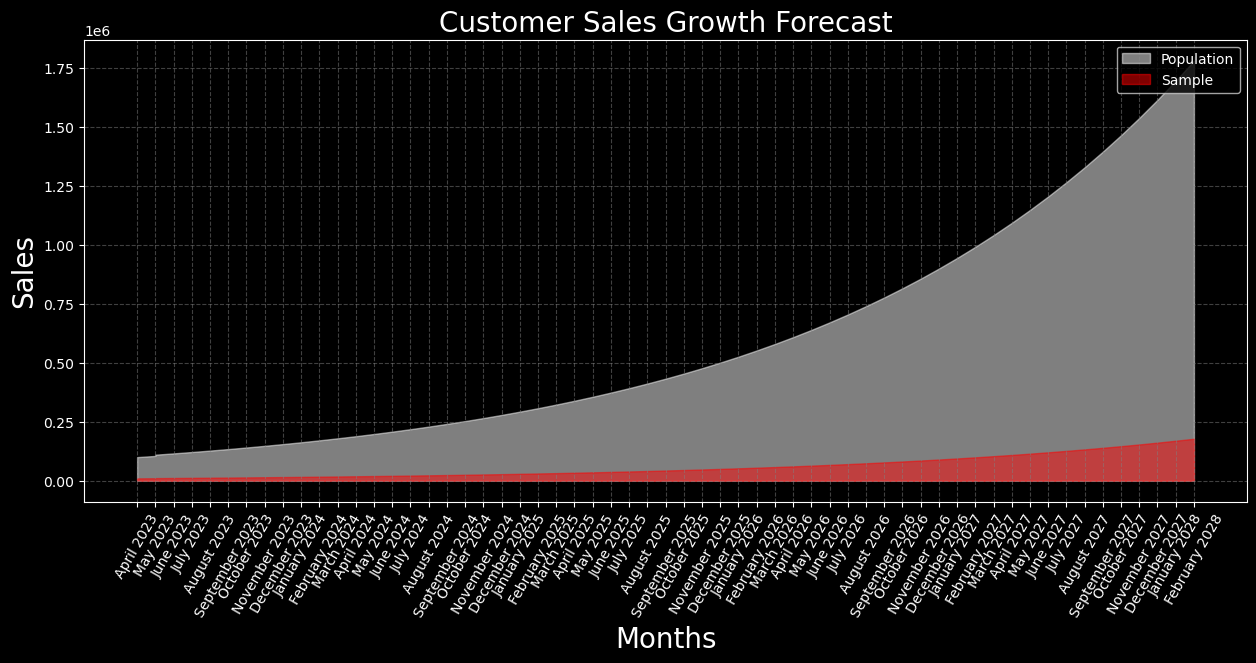

In [200]:
plt.style.use('dark_background')
plt.figure(figsize=(15,6))
plt.fill_between(population_df["Date"], population_df["Sales"], color="white", alpha=0.5, label="Population")
plt.fill_between(sample_df["Date"], sample_df["Sales"], color="red", label="Sample", alpha=0.5)
plt.grid(linestyle='--', color='gray', alpha=0.5)
plt.xticks(rotation=60)
plt.xlabel('Months',fontsize=20)
plt.ylabel('Sales',fontsize=20)
plt.title('Customer Sales Growth Forecast',fontsize=20)
plt.legend()
plt.show()

In [201]:
# Compare the growth rates
population_growth_rate = (population_df['Sales'].iloc[-1] - population_df['Sales'].iloc[0]) / population_df['Sales'].iloc[0]
sample_growth_rate = (sample_df['Sales'].iloc[-1] - sample_df['Sales'].iloc[0]) / sample_df['Sales'].iloc[0]

print("Population growth rate:", population_growth_rate)
print("Sample growth rate:", sample_growth_rate)

Population growth rate: 16.789700851545707
Sample growth rate: 16.789700851545707


#### VALIDATION

In [204]:
forecast_df.head(3)

,Month,Sales,Date
0,1,598.000,April 2023
1,2,627.900,May 2023
2,3,659.295,May 2023


In [51]:
first_month_sale = fee * frequency * num_customers * sample_rate
round(first_month_sale,4)

598.0

In [63]:
second_month_sale = first_month_sale + (first_month_sale*growth) 
round(second_month_sale,4)

627.9

In [62]:
third_month_sale = second_month_sale + (second_month_sale*growth)
round(third_month_sale, 4)

659.295

In [207]:
forecast_df.tail(1)

,Month,Sales,Date
59,60,10638.241109,February 2028


In [60]:
final_month_sale = first_month_sale * (1 + growth) ** (12 * year - 1)
round(final_month_sale, 4)

10638.2411